In [1]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [1]:
!pip install python-crfsuite
!pip install sklearn-pycrfsuite

     |████████████████████████████████| 485 kB 17.2 MB/s 
  Created wheel for sklearn-pycrfsuite: filename=sklearn_pycrfsuite-0.4.0-py2.py3-none-any.whl size=11001 sha256=70ec233b12e361fd8478e53d1b4547dd22323f6a25f3ef0e1cc0bdfbc427db89
  Stored in directory: /root/.cache/pip/wheels/44/50/b1/295e502c6652f551dc99bfdb394a3fe2fcb47668e333391f38
  Created wheel for python-crfsuite-extension: filename=python_crfsuite_extension-0.9.7-cp37-cp37m-linux_x86_64.whl size=777663 sha256=d3c69876555a36fdc98f84a7e0bc58b8d9b81689d2912526bb2d859ff3d8e2cb
  Stored in directory: /root/.cache/pip/wheels/70/d7/bf/369f4d179407dbf3840132e4135fa61f0bf711f4496d0bf750
Successfully built sklearn-pycrfsuite python-crfsuite-extension


In [7]:
import nltk

#0-500
train_data=[]
HMM_acc=[]
TnT_acc=[]
PER_acc=[]
CRF_acc=[]
test_data = nltk.corpus.treebank.tagged_sents()[3001:]
trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()
 
print("\nTraining HMM:----------------------------")
for i in range(500,3001,500):
 train_data=(nltk.corpus.treebank.tagged_sents()[:i])

#HMM calculation
 HMM = trainer.train_supervised(train_data)
 print('\naccuracy for %d sentences: ' %i +str(round(HMM.evaluate(test_data), 3)))
 HMM_acc.append(round(HMM.evaluate(test_data),3))
 print(HMM.tag(['the', 'men', 'attended', 'to', 'the', 'meetings']))

print("\nTraining TnT:----------------------------")
for i in range(500,3001,500):
 train_data=(nltk.corpus.treebank.tagged_sents()[:i])

#TnT calculation
 TnT = nltk.tag.tnt.TnT()
 TnT.train(train_data)
 print('\naccuracy for %d sentences: ' %i +str(round(TnT.evaluate(test_data), 3)))
 TnT_acc.append(round(TnT.evaluate(test_data),3))
 print(TnT.tag(['the', 'men', 'attended', 'to', 'the', 'meetings']))

print("\nTraining PER:-----------------------------")
for i in range(500,3001,500):
 train_data=(nltk.corpus.treebank.tagged_sents()[:i])

#PER calculation
 PER = nltk.tag.perceptron.PerceptronTagger(load=False)
 PER.train(train_data) 
 print('\naccuracy for %d sentences: ' %i +str(round(PER.evaluate(test_data), 3)))
 PER_acc.append(round(PER.evaluate(test_data),3))
 print(PER.tag(['the', 'men', 'attended', 'to', 'the', 'meetings']))

print("\nTraining CRF:-----------------------------")
for i in range(500,3001,500):
 train_data=(nltk.corpus.treebank.tagged_sents()[:i])

#CRF calculation
 CRF = nltk.tag.CRFTagger()
 
 CRF.train(train_data,'crf_tagger_model')
 print('\naccuracy for %d sentences: ' %i +str(round(CRF.evaluate(test_data), 3)))
 CRF_acc.append(round(CRF.evaluate(test_data),3))
 print(CRF.tag(['the', 'men', 'attended', 'to', 'the', 'meetings']))




Training HMM:----------------------------

accuracy for 500 sentences: 0.173
[('the', 'DT'), ('men', 'NNP'), ('attended', 'NNP'), ('to', 'NNP'), ('the', 'NNP'), ('meetings', 'NNP')]

accuracy for 1000 sentences: 0.221
[('the', 'DT'), ('men', 'NNP'), ('attended', 'NNP'), ('to', 'NNP'), ('the', 'NNP'), ('meetings', 'NNP')]

accuracy for 1500 sentences: 0.262
[('the', 'DT'), ('men', 'NNS'), ('attended', 'NNP'), ('to', 'NNP'), ('the', 'NNP'), ('meetings', 'NNP')]

accuracy for 2000 sentences: 0.304
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]

accuracy for 2500 sentences: 0.335
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]

accuracy for 3000 sentences: 0.369
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]

Training TnT:----------------------------

accuracy for 500 sentences: 0.747
[('the', 'DT'), ('men', 'NNS'), ('attend

In [8]:
import pandas as pd

#Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).
x=[500,1000,1500,2000,2500,3000]
hmm_tag = ['HMM' for i in x]
tnt_tag = ['TnT' for i in x]
per_tag = ['PER' for i in x]
crf_tag = ['CRF' for i in x]
data = {'train size': [*x, *x, *x, *x],
        'accuracy': [*HMM_acc, *TnT_acc, *PER_acc, *CRF_acc],
        'model': [*hmm_tag, *tnt_tag, *per_tag, *crf_tag]}
df = pd.DataFrame(data)

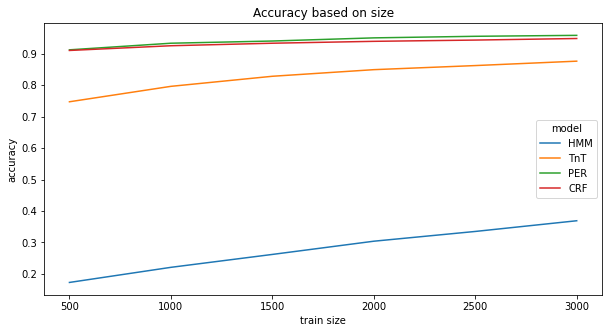

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='train size', y='accuracy', hue='model')
plt.title("Accuracy based on size")
plt.show()
# Based on the below results Perceptron and CRF are the best for accuracy, 
# But I would choose the Perceptron Model because if we keep increasing the number of sentences
# it is observed from the graph that the Perceptron performs better than CRF by a few points.